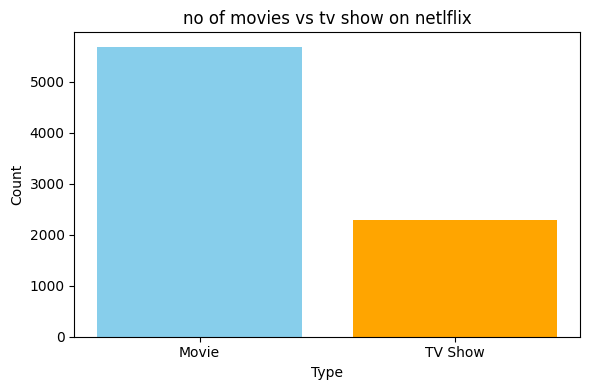

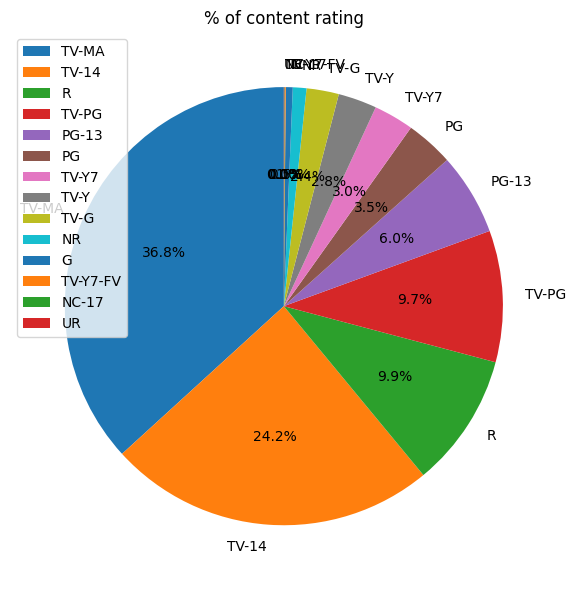

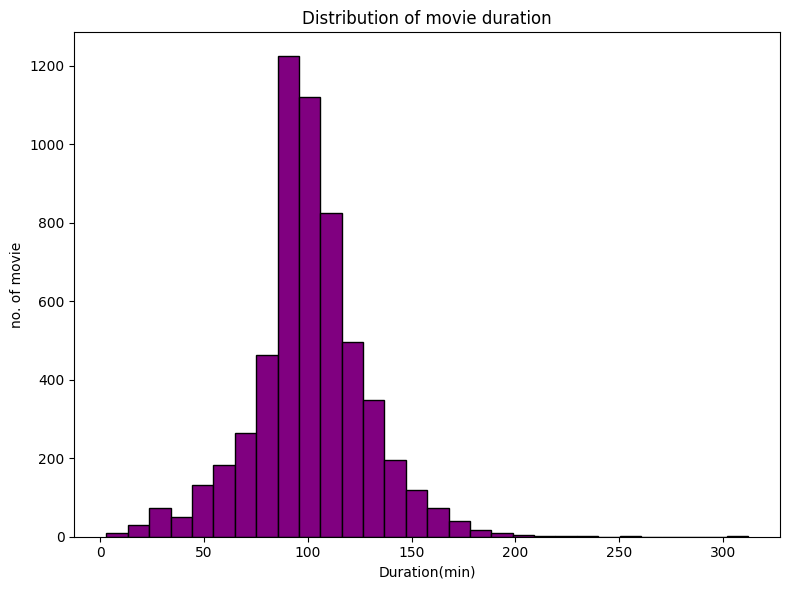

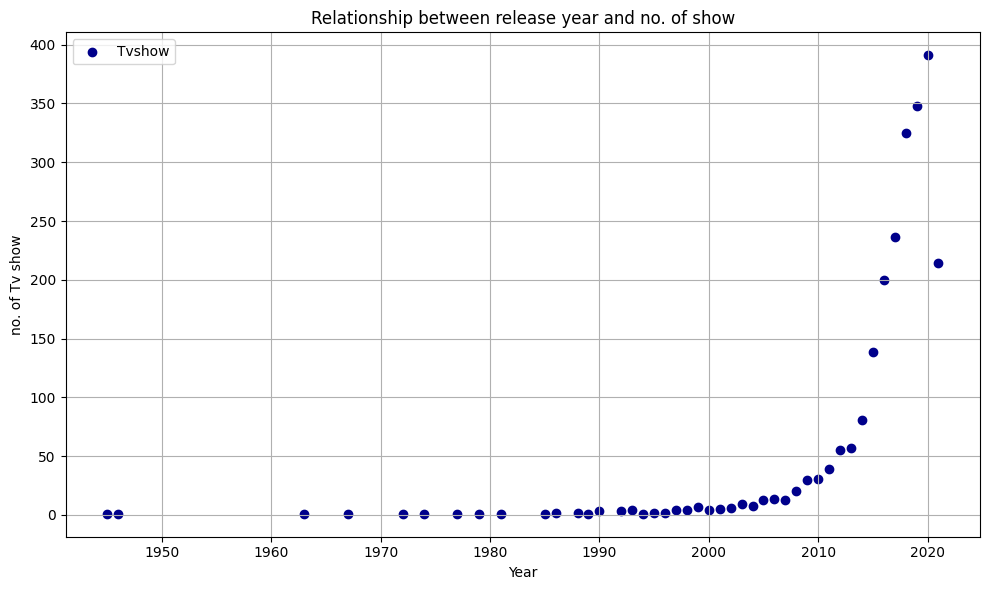

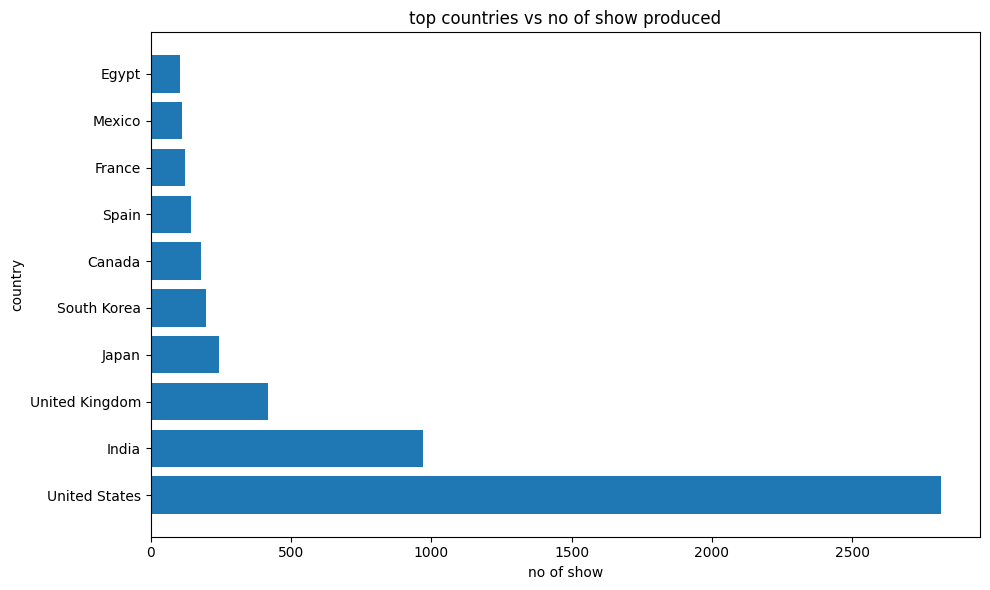

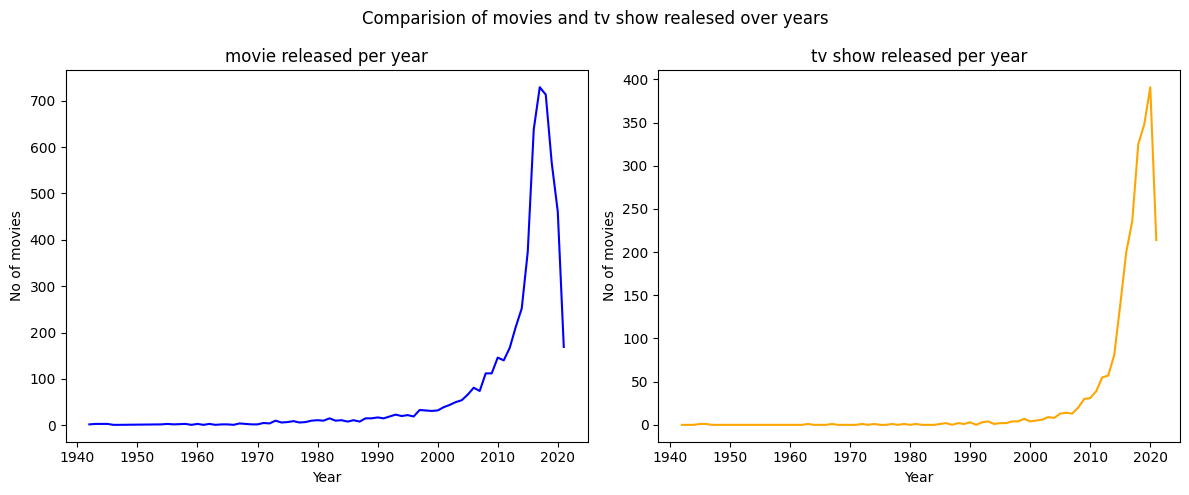

In [46]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df=pd.read_csv('netflix_titles.csv')

#clean the data
df=df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts=df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('no of movies vs tv show on netlflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movie_vs_tv_show.png',dpi=300,bbox_inches='tight')
plt.show()

rating_counts=df['rating'].value_counts()
rating_counts
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('% of content rating')
plt.legend()
plt.tight_layout()
plt.savefig('content_rating_pir.png',dpi=300,bbox_inches='tight')
plt.show()

movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of movie duration')
plt.xlabel('Duration(min)')
plt.ylabel('no. of movie')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png',dpi=300,bbox_inches='tight')
plt.show()

tv_df=df[df['type']== 'TV Show'].copy()
tv_df=tv_df['release_year'].value_counts()
plt.figure(figsize=(10,6))
plt.scatter(tv_df.index,tv_df.values,color='darkblue',marker='o',label='Tvshow')
plt.title('Relationship between release year and no. of show')
plt.xlabel('Year')
plt.ylabel('no. of Tv show')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('movie_year_scatter.png',dpi=300,bbox_inches='tight')
plt.show()


country_df=df['country'].value_counts()# we can write .head(10) also
top_10=country_df.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_10.index,top_10.values,label="top 10 countries with show")
plt.title('top countries vs no of show produced')
plt.xlabel('no of show')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top_10_country_productionshow.png',dpi=300,bbox_inches='tight')
plt.show()


content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
content_by_year
fig,ax=plt.subplots(1,2,figsize=(12,5))
# first subplt of movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title("movie released per year")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No of movies')

#second for tv show
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='Orange')
ax[1].set_title("tv show released per year")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('No of movies')

fig.suptitle('Comparision of movies and tv show realesed over years')
plt.tight_layout()
plt.savefig('comp_of_movies_and_tvshow_by_year.png',dpi=300,bbox_inches='tight')
plt.show()